In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#read the test data
testdata = pd.read_csv(
    "sign_mnist_test.csv"
)
testdata.shape

(7172, 785)

In [4]:
#process the features
testFeatures = testdata.iloc[:, 1:785]
XT = testFeatures.to_numpy()
XT = XT.reshape(-1, 28, 28)
#FinalXT = (XT - 127)/128

In [5]:
#process the labels
testLabels = testdata.iloc[:, 0]
testLabels.shape
YT = testLabels.to_numpy()

In [6]:
#read the training data
rawdata = pd.read_csv(
    "sign_mnist_train.csv",
    )
rawdata.shape


(27455, 785)

In [7]:
#process the features
trainFeatures = rawdata.iloc[:, 1:785]
X = trainFeatures.to_numpy()
X = X.reshape(-1, 28, 28)
#FinalX = (X - 127)/128

In [8]:
#process the labels
trainLabels = rawdata.iloc[:, 0]
trainLabels.shape
Y = trainLabels.to_numpy()

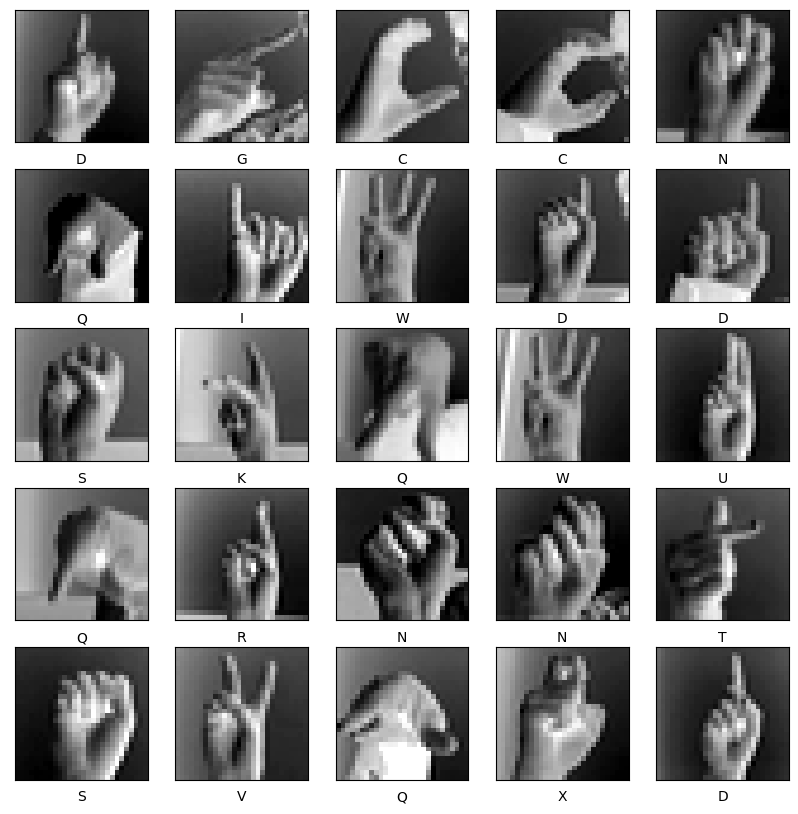

In [9]:
#assign names to the classes
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

#display some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # interpolation="gaussian"
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y[i]])
plt.show()

In [10]:
%timeit
#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size= [2,2]),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=[2,2]),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=[2,2]),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(26, activation = "softmax")
])
#complile the model
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#print a summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [14]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "signCNN_1/cp-{epoch:04d}.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 50

# Create a callback that saves the model's weights every 5 epochs
#cp_callback = tf.keras.callbacks.ModelCheckpoint(
    #filepath=checkpoint_path, 
    #verbose=1, 
    #save_weights_only=True,
    #save_freq=2*batch_size)


# Save the weights using the `checkpoint_path` format
#model.save_weights(checkpoint_path.format(epoch=0))


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1, monitor='val_accuracy')

In [11]:
# Loads the weights
model.load_weights("signCNN_1\cp-0150.ckpt")

In [161]:
%%time 
#print time that it takes to train network

#train the model
model.fit(X, Y, epochs = 150, batch_size= batch_size, ) #callbacks=[cp_callback] <- removed for saftey


Epoch 1/150
 79/550 [===>..........................] - ETA: 15s - loss: 2.4144e-09 - accuracy: 1.0000

KeyboardInterrupt: 

In [12]:
#Evaluate the model
model.evaluate(XT,YT)
predictions = model.predict(XT)

225/225 [==============================] - 1s 3ms/step


In [ ]:
predictions[2502]
for i in range(26):
    
    print(class_names[i] + ": ")
    print(predictions[2502][i])

In [58]:
#find the best guess for each item in the test set
bestGuesses = []
bestGuess = 0
for i in range(7172):
    for j in range(26):
        if(predictions[i][j] >= predictions[i][bestGuess]):
            bestGuess = j
    bestGuesses.append(bestGuess)
    

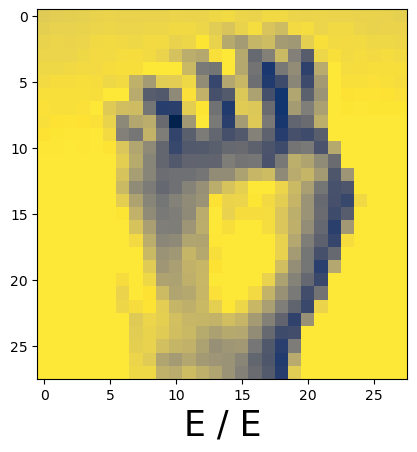

In [44]:
#Interesting guesses: 123, 2345,
#item for the next blocks
item = 2345

#show the true information about the item in question
plt.figure()
plt.imshow(XT[item],cmap="cividis")
#plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[YT[item]] + " / " + class_names[bestGuesses[item]],fontsize = 25)
plt.show()

Text(0, 0.5, 'Confidence')

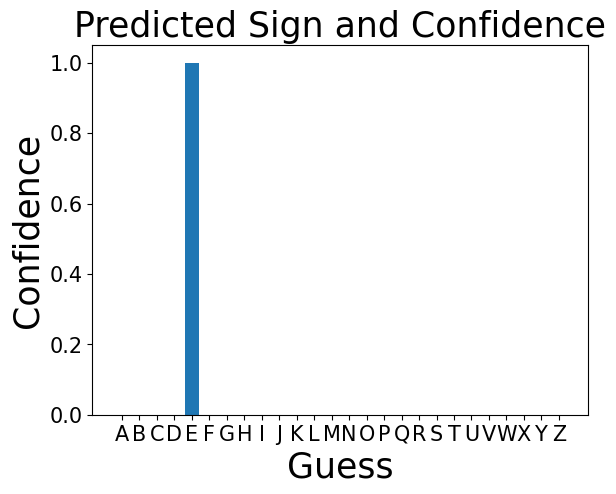

In [45]:
#display guesses and confidences
plt.figure
plt.bar(class_names, predictions[item]) 
plt.title("Predicted Sign and Confidence",fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("Guess",fontsize = 25)
plt.ylabel("Confidence",fontsize = 25)


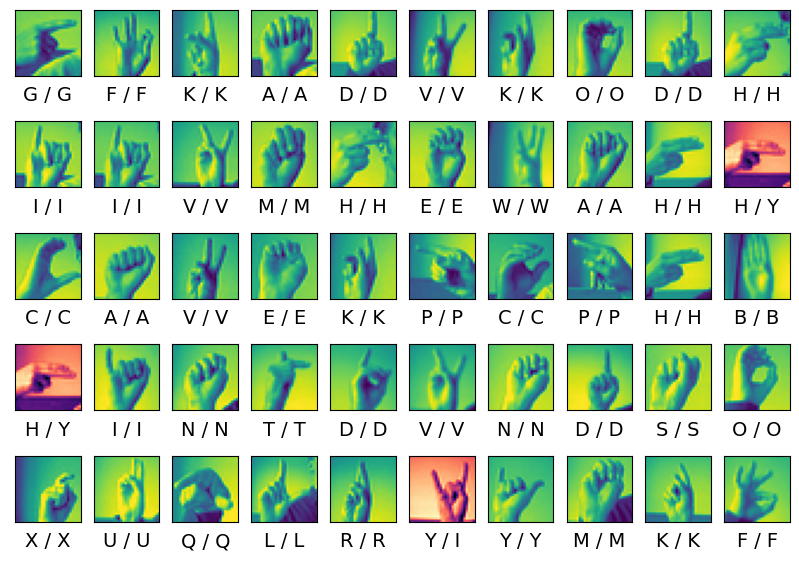

In [98]:
offset = 0
#display first 40 examples
plt.figure(figsize=(10,7))
for i in range(40):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # interpolation="gaussian"
    if(class_names[YT[i+offset]] != class_names[bestGuesses[i+offset]]):
        plt.imshow(XT[i+offset], cmap=plt.cm.magma)
    else:
        plt.imshow(XT[i+offset], cmap=plt.cm.viridis)
    plt.xlabel(class_names[YT[i+offset]] + " / " + class_names[bestGuesses[i+offset]],fontsize=14)
    
#display selected items
curatedItems = [41,52,54,62,87,88,117,124,148,789]    
for i in range(10):
    plt.subplot(5,10,40+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # interpolation="gaussian"
    if(class_names[YT[curatedItems[i]]] != class_names[bestGuesses[curatedItems[i]]]):
        plt.imshow(XT[curatedItems[i]], cmap=plt.cm.magma)
    else:
        plt.imshow(XT[curatedItems[i]], cmap=plt.cm.viridis)
    plt.xlabel(class_names[YT[curatedItems[i]]] + " / " + class_names[bestGuesses[curatedItems[i]]],fontsize=14)        
plt.show()

In [80]:
#Compute per letter accuracy
numGuessed = []
numCorrect = []
propCorrect = []
for j in range(26):
      numCorrect.append(0)
      numGuessed.append(0)

#count the number of correct guesses
for i in range(7172):
    if(bestGuesses[i]  == YT[i]):
        numCorrect.insert(YT[i],(numCorrect.pop(YT[i])+1))
    numGuessed.insert(YT[i],(numGuessed.pop(YT[i])+1))

print(numGuessed)
print(numCorrect)
for i in range(26):
    if (0 != numGuessed[i]):
        propCorrect.append((1.0*numCorrect[i]/numGuessed[i]))
    else:
        propCorrect.append(0)


[331, 432, 310, 245, 498, 247, 348, 436, 288, 0, 331, 209, 394, 291, 246, 347, 164, 144, 246, 248, 266, 346, 206, 267, 332, 0]
[331, 407, 292, 227, 480, 247, 238, 393, 232, 0, 308, 209, 382, 231, 205, 347, 144, 81, 211, 181, 226, 313, 187, 235, 293, 0]
[1.0, 0.9421296296296297, 0.9419354838709677, 0.926530612244898, 0.963855421686747, 1.0, 0.6839080459770115, 0.9013761467889908, 0.8055555555555556, 0, 0.9305135951661632, 1.0, 0.9695431472081218, 0.7938144329896907, 0.8333333333333334, 1.0, 0.8780487804878049, 0.5625, 0.8577235772357723, 0.7298387096774194, 0.849624060150376, 0.9046242774566474, 0.9077669902912622, 0.8801498127340824, 0.8825301204819277, 0]


Text(0, 0.5, 'Accuracy')

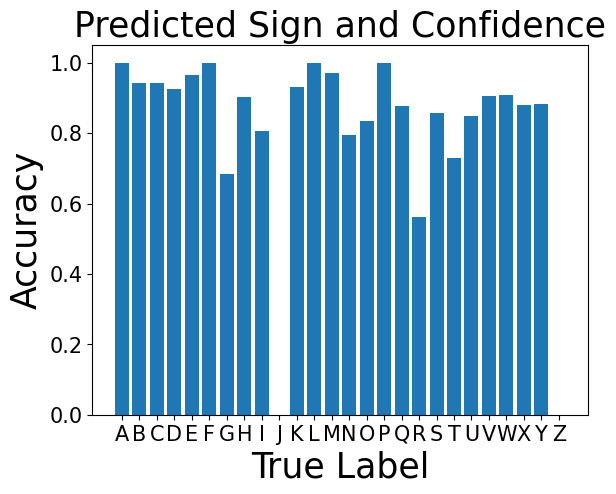

In [82]:
#display guesses and confidences
plt.figure
plt.bar(class_names, propCorrect) 
plt.title("Predicted Sign and Confidence",fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("True Label",fontsize = 25)
plt.ylabel("Accuracy",fontsize = 25)

In [88]:
#print out accuracy for each letter
for i in range(26):
    print(class_names[i])
    print(propCorrect[i])

A
1.0
B
0.9421296296296297
C
0.9419354838709677
D
0.926530612244898
E
0.963855421686747
F
1.0
G
0.6839080459770115
H
0.9013761467889908
I
0.8055555555555556
J
0
K
0.9305135951661632
L
1.0
M
0.9695431472081218
N
0.7938144329896907
O
0.8333333333333334
P
1.0
Q
0.8780487804878049
R
0.5625
S
0.8577235772357723
T
0.7298387096774194
U
0.849624060150376
V
0.9046242774566474
W
0.9077669902912622
X
0.8801498127340824
Y
0.8825301204819277
Z
0
